In [1]:
!pip3 install torch

     |████████████████████████████████| 831.4 MB 32 kB/s  eta 0:00:013   |█▊                              | 45.0 MB 2.6 MB/s eta 0:04:59     |█████████▊                      | 253.1 MB 5.3 MB/s eta 0:01:504.6 MB/s eta 0:01:46     |█████████████▌                  | 349.6 MB 11.2 MB/s eta 0:00:43     |█████████████▉                  | 358.1 MB 510 kB/s eta 0:15:28     |█████████████▉                  | 358.7 MB 510 kB/s eta 0:15:26     |██████████████▎                 | 370.9 MB 2.6 MB/s eta 0:03:00     |███████████████▉                | 410.1 MB 5.2 MB/s eta 0:01:22     |█████████████████▏              | 445.7 MB 5.8 MB/s eta 0:01:08     |█████████████████▎              | 448.7 MB 5.6 MB/s eta 0:01:09   | 499.6 MB 551 kB/s eta 0:10:02   | 504.8 MB 564 kB/s eta 0:09:39   | 505.7 MB 263 kB/s eta 0:20:35     |███████████████████████         | 596.1 MB 2.3 MB/s eta 0:01:43     |███████████████████████▋        | 614.1 MB 3.3 MB/s eta 0:01:07  |███████████████████████▊        | 616.0 MB 3.3 M

In [14]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

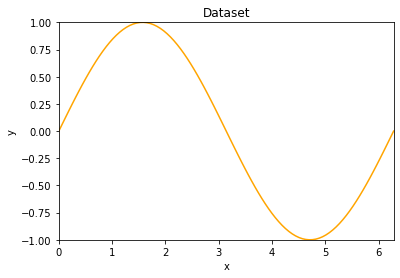

In [346]:
class Data(Dataset):
    
    def __init__(self, N_SAMPLES=100):
        self.x = torch.linspace(start=0, end=2 * np.pi, steps=N_SAMPLES).view(-1,1)
        self.y = torch.sin(self.x)
            
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.y)
    

    def plot(self):
        plt.plot(self.x.numpy(), self.y.numpy() , color='orange')
        plt.title("Dataset")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 2*np.pi))
        plt.ylim((-1, 1))
        plt.show()
        
data_set = Data()
data_set.plot()

In [242]:
class Net(nn.Module):
    

    def __init__(self, layers_configuration):
        super(Net, self).__init__()
        self.hidden_layers = nn.ModuleList()
        for input_size, output_size in zip(layers_configuration, layers_configuration[1:]):
            self.hidden_layers.append(nn.Linear(input_size, output_size))
    

    def forward(self, activation):
        number_of_hideen_layers = len(self.hidden_layers)
        for (hidden_layer_index, linear_transform) in zip(range(number_of_hideen_layers), self.hidden_layers):
            if hidden_layer_index < number_of_hideen_layers - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation

In [243]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    LOSS = []
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
    
    return LOSS

In [375]:
model = Net([1, 64, 64, 1])
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=16)
criterion = nn.MSELoss()
LOSS = train(data_set, model, criterion, train_loader, optimizer, epochs=4000)

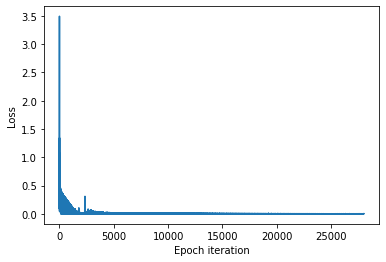

In [376]:
plt.plot(LOSS)
plt.xlabel("Epoch iteration")
plt.ylabel("Loss")
plt.show()

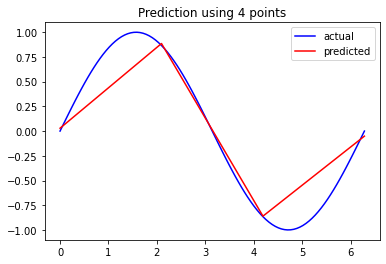

In [377]:
x = torch.linspace(start=0, end=2 * np.pi, steps=100).view(-1,1)
pred_x = torch.linspace(start=0, end=2 * np.pi, steps=4).view(-1,1)
predictions = model(pred_x)

plt.title("Prediction using 4 points")
plt.plot(x.detach().numpy(), torch.sin(x), label="actual", c="b")
plt.plot(pred_x.detach().numpy(), predictions.detach().numpy(), label="predicted", c="r")
plt.legend()
plt.show()

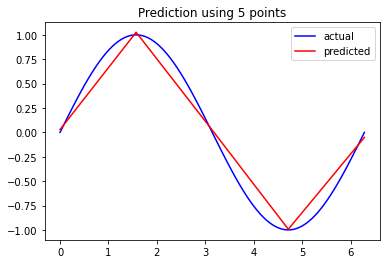

In [378]:
x = torch.linspace(start=0, end=2 * np.pi, steps=100).view(-1,1)
pred_x = torch.linspace(start=0, end=2 * np.pi, steps=5).view(-1,1)
predictions = model(pred_x)

plt.title("Prediction using 5 points")
plt.plot(x.detach().numpy(), torch.sin(x), label="actual", c="b")
plt.plot(pred_x.detach().numpy(), predictions.detach().numpy(), label="predicted", c="r")
plt.legend()
plt.show()

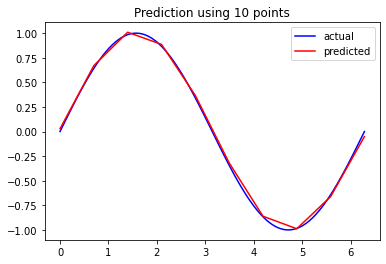

In [379]:
x = torch.linspace(start=0, end=2 * np.pi, steps=100).view(-1,1)
pred_x = torch.linspace(start=0, end=2 * np.pi, steps=10).view(-1,1)
predictions = model(pred_x)

plt.title("Prediction using 10 points")
plt.plot(x.detach().numpy(), torch.sin(x), label="actual", c="b")
plt.plot(pred_x.detach().numpy(), predictions.detach().numpy(), label="predicted", c="r")
plt.legend()
plt.show()

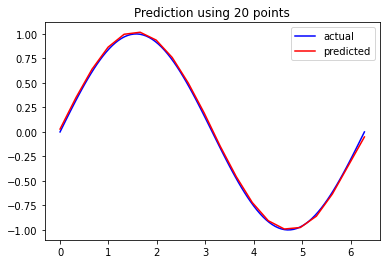

In [380]:
x = torch.linspace(start=0, end=2 * np.pi, steps=100).view(-1,1)
pred_x = torch.linspace(start=0, end=2 * np.pi, steps=20).view(-1,1)
predictions = model(pred_x)

plt.title("Prediction using 20 points")
plt.plot(x.detach().numpy(), torch.sin(x), label="actual", c="b")
plt.plot(pred_x.detach().numpy(), predictions.detach().numpy(), label="predicted", c="r")
plt.legend()
plt.show()

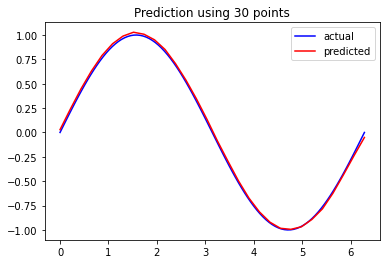

In [381]:
x = torch.linspace(start=0, end=2 * np.pi, steps=100).view(-1,1)
pred_x = torch.linspace(start=0, end=2 * np.pi, steps=30).view(-1,1)
predictions = model(pred_x)

plt.title("Prediction using 30 points")
plt.plot(x.detach().numpy(), torch.sin(x), label="actual", c="b")
plt.plot(pred_x.detach().numpy(), predictions.detach().numpy(), label="predicted", c="r")
plt.legend()
plt.show()

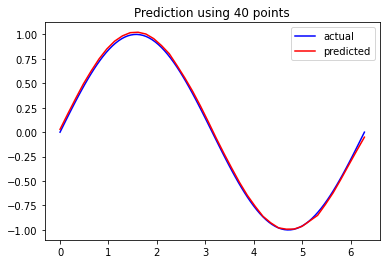

In [382]:
x = torch.linspace(start=0, end=2 * np.pi, steps=100).view(-1,1)
pred_x = torch.linspace(start=0, end=2 * np.pi, steps=40).view(-1,1)
predictions = model(pred_x)

plt.title("Prediction using 40 points")
plt.plot(x.detach().numpy(), torch.sin(x), label="actual", c="b")
plt.plot(pred_x.detach().numpy(), predictions.detach().numpy(), label="predicted", c="r")
plt.legend()
plt.show()